In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

Using TensorFlow backend.


In [14]:
datagen = ImageDataGenerator(
    validation_split = 0.2,
    rescale=1./255
)

tsize = 128

train_gen = datagen.flow_from_directory('Downloads/colorectal/data2', class_mode='categorical', target_size=(tsize,tsize), shuffle=True)

#train_gen = datagen.flow_from_directory('Downloads/colorectal/data/Train', class_mode='categorical', target_size=(tsize,tsize))
#val_gen = datagen.flow_from_directory('Downloads/colorectal/data/Validate', class_mode='categorical', target_size=(tsize,tsize))
#test_gen = datagen.flow_from_directory('Downloads/colorectal/data/Test', class_mode='categorical', target_size=(tsize,tsize))

Found 5000 images belonging to 8 classes.


In [41]:
# Check Data Images
# batchX, batchy = train_gen.next() 
# index = 15
# plt.imshow(batchX[index])
# print(batchy[index])
# batchy.shape

In [33]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(tsize, tsize, 3)),
    tf.keras.layers.MaxPooling2D(2, 2), #127x127
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), #62x62
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(8, activation='softmax')
])

In [34]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

In [35]:
algo1 = model.fit_generator(
    train_gen,
    validation_data=val_gen,
    epochs = 10
)

Epoch 1/10
157/157 [==============================] - 34s 219ms/step - loss: 1.7232 - acc: 0.3152 - val_loss: 1.1062 - val_acc: 0.5958
Epoch 2/10
157/157 [==============================] - 29s 182ms/step - loss: 1.0145 - acc: 0.5848 - val_loss: 0.9354 - val_acc: 0.6333
Epoch 3/10
157/157 [==============================] - 28s 177ms/step - loss: 0.8198 - acc: 0.6862 - val_loss: 0.8255 - val_acc: 0.6792
Epoch 4/10
157/157 [==============================] - 28s 180ms/step - loss: 0.7018 - acc: 0.7344 - val_loss: 0.5273 - val_acc: 0.8125
Epoch 5/10
157/157 [==============================] - 28s 180ms/step - loss: 0.6699 - acc: 0.7448 - val_loss: 0.6373 - val_acc: 0.7250
Epoch 6/10
157/157 [==============================] - 28s 181ms/step - loss: 0.5964 - acc: 0.7730 - val_loss: 0.4004 - val_acc: 0.8708
Epoch 7/10
157/157 [==============================] - 29s 186ms/step - loss: 0.5277 - acc: 0.7970 - val_loss: 0.4763 - val_acc: 0.8167
Epoch 8/10
157/157 [==============================] - 2

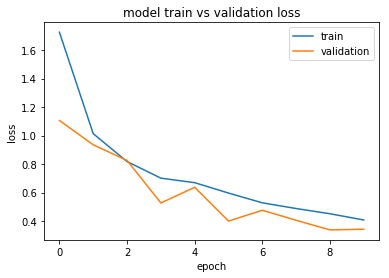

In [36]:
#model diagnostic
plt.plot(algo1.history['loss'])
plt.plot(algo1.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [37]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 63, 63, 16)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 28, 28, 32)       

In [38]:
import h5py as h5

In [39]:
scores = model.evaluate(train_gen, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 85.14%


In [40]:
model.save_weights('colorectal_weights_v1.h5')

ML predicts cell type is Adipose
Actual cell type is Adipose


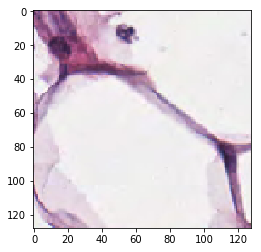

In [115]:
# Show & Predict
batchX, batchy = train_gen.next() 
plt.imshow(batchX[1])
cell = model.predict_classes(batchX)
y_class = ('Tumor', 'Stroma', 'Complex', 'Lympho', 'Debris', 'Mucosa', 'Adipose', 'Empty')
print('ML predicts cell type is', y_class[cell[1]])
print('Actual cell type is', y_class[np.argmax(batchy[1])])